<h3>Visualize Activation Maps for Age detection</3>

In [25]:
#import necesary librarieesp


In [26]:

import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D
from tensorflow.keras.layers import Add,Input,Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

In [27]:
folder='./UTKFace'

In [28]:

files=os.listdir(folder)


In [29]:
ages=[]
images=[]

for file in files:
    age=int(file.split('_')[0])
    ages.append(age)
    
    total=folder+'/'+file
    #print(total)
    image=cv2.imread(total)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))
    images.append(image)

In [30]:
print(ages[77])

10


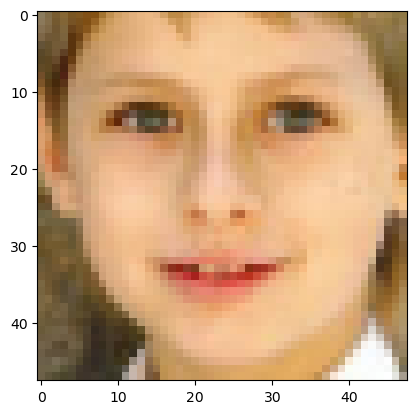

In [31]:
plt.imshow(images[77])

In [32]:

ages_f=np.array(ages)
images_f=np.array(images)


In [33]:
np.save(folder+'ages.npy',ages_f)
np.save(folder+'images.npy',images_f)


<h3>##plotting a result<h3>

In [34]:
values,counts=np.unique(ages_f,return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


In [35]:
type(ages_f)

numpy.ndarray

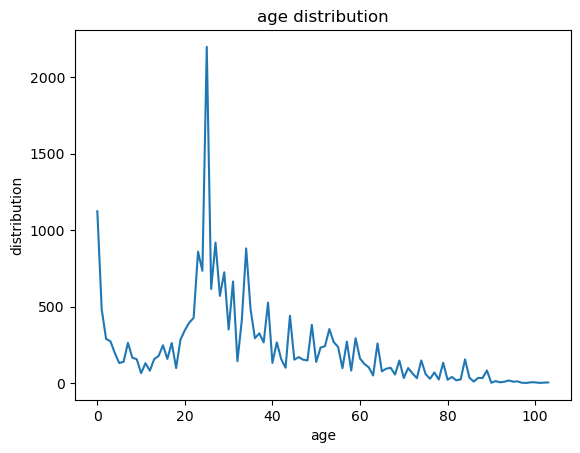

In [36]:
plt.plot(counts)
plt.title("age distribution")
plt.xlabel("age")
plt.ylabel("distribution")
plt.show()

In [37]:
#split data set into train_test

In [38]:
images_f_2=images_f/255



In [39]:
images_f_2.shape

(23708, 48, 48, 3)

In [40]:
ages_f.shape

(23708,)

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(images_f_2,ages_f,test_size=0.25)
y_train[0:4]


array([ 1, 24,  1, 92])

In [42]:
y_test[0:4]

array([44, 59, 85,  1])

<h3>Build model</h3>

In [43]:
def Convolution(input_tensor,filters):
    x=Conv2D(filters=filters,padding='same',strides=(1,1),kernel_size=(3,3),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x


In [44]:

#convolution layer along with maxpool layers

def model(input_shape):
    inputs=Input((input_shape))
    conv_1=Convolution(inputs,32)
    max_1=MaxPool2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(max_1,64)
    max_2=MaxPool2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(max_2,128)
    max_3=MaxPool2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(max_3,256)
    max_4=MaxPool2D(pool_size=(2,2))(conv_4)
    
    flatten=Flatten()(max_4)
    dense_1=Dense(64,activation='relu')(flatten)
    
    dropout_1=Dropout(0.1)(dense_1)
    
    output_1=Dense(1,activation='relu',name='age_out')(dropout_1)

    model=Model(inputs=[inputs],outputs=[output_1])
    model.compile(loss=['binary_crossentropy'],optimizer='Adam',metrics=['accuracy'])
    return model

In [45]:


model=model((48,48,3))

In [46]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ age_out (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,001 (2.04 MB)

 Trainable params: 536,001 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:


from tensorflow.keras.callbacks import ModelCheckpoint

In [48]:


file_s='Age_Detection.keras'
checkpoint=ModelCheckpoint(file_s,verbose=1,monitor='val_loss',save_best_only=True,save_weights_only=False,save_freq='epoch',mode='auto')
earlystop=tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights=True)
callback_list=[checkpoint,earlystop]

In [49]:
History=model.fit(x_train,y_train,batch_size=64,validation_data=(x_test,y_test),epochs=2,callbacks=callback_list)


Epoch 1/2


c:\Users\tusha\anaconda3\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 48, 48, 3))
  warnings.warn(msg)


278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.0475 - loss: -484.7342
Epoch 1: val_loss improved from inf to -513.95721, saving model to Age_Detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 66s 194ms/step - accuracy: 0.0475 - loss: -484.8246 - val_accuracy: 0.0447 - val_loss: -513.9572
Epoch 2/2
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.0511 - loss: -510.9234
Epoch 2: val_loss improved from -513.95721 to -513.97687, saving model to Age_Detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 57s 204ms/step - accuracy: 0.0511 - loss: -510.9380 - val_accuracy: 0.0447 - val_loss: -513.9769


In [50]:

#Model.evaluate(x_test,y_test)

In [51]:

#pred=Model.predict(x_test)
#pred[0:5]

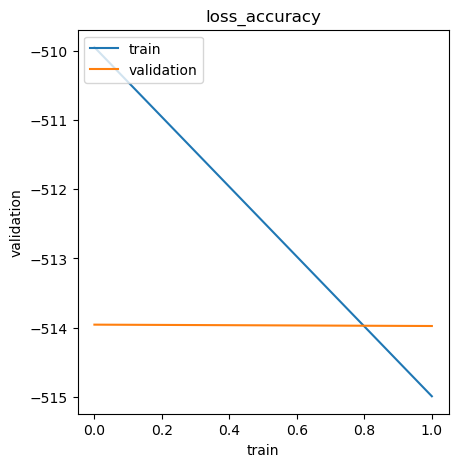

In [52]:
#plotting 

plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title("loss_accuracy")
plt.xlabel("train")
plt.ylabel("validation")
plt.legend(['train','validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.2,right=0.88,left=0.3,hspace=0.25,wspace=0.30)


In [53]:
#from tensorflow.keras.applications.vgg16 import VGG16 as Model
#from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.preprocessing import image
#from tensorflow.keras_vis.utils import normalize
#from tensorflow.keras.applications.vgg16 import decode_predictions


In [54]:

#load img
img1='UTKFace/32_1_1_20170113000450474.jpg.chip.jpg'
img2=load_img('UTKFace/40_0_0_20170113141815046.jpg.chip.jpg',target_size=(224,224))

In [55]:
print(type(img1))

<class 'str'>


In [56]:
img_1=np.array(img1)
type(img_1)

numpy.ndarray

 19/741 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step  

c:\Users\tusha\anaconda3\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 48, 48, 3))
  warnings.warn(msg)


741/741 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step


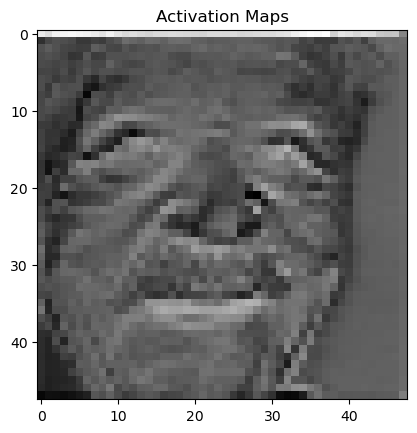

In [57]:
layer_name = 'conv2d'
layer = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
activations = layer.predict(images_f)
activation_maps = activations[0, :, :, 2]
plt.imshow(activation_maps, cmap='grey')
plt.title('Activation Maps')
plt.show()   